In [2]:
import torch
import pandas as pd
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F

In [3]:
train = pd.read_csv("train.csv", header=None, index_col=0)

In [4]:
days, PRIOR_N = train.shape

In [5]:
# Define the generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        hidden_size = 10
        self.fc1 = nn.Linear(PRIOR_N, hidden_size)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.act2 = nn.ReLU()
#         self.fc3 = nn.Linear(hidden_size, hidden_size)
#         self.act3 = nn.ReLU()
#         self.fc4 = nn.Linear(hidden_size, hidden_size)
#         self.act4 = nn.ReLU()
#         self.fc5 = nn.Linear(hidden_size, hidden_size)
#         self.act5 = nn.ReLU()
#         self.fc6 = nn.Linear(hidden_size, hidden_size)
#         self.act6 = nn.ReLU()
        self.fc7 = nn.Linear(hidden_size, PRIOR_N)
    

    def __call__(self, z):
        z = self.fc1(z)
        z = self.act1(z)
        z = self.fc2(z)
        z = self.act2(z)
        #z = self.fc3(z)
        #z = self.act3(z)
        #z = self.fc4(z)
        #z = self.act4(z)
        #z = self.fc5(z)
        #z = self.act5(z)
        #z = self.fc6(z)
        #z = self.act6(z)
        z = self.fc7(z)
        
        return z
    
    def generate(self, batchlen):
        z = torch.exp(torch.normal(torch.zeros(batchlen, PRIOR_N), 1.0)).cuda()
        return self.__call__(z)
    

# Define the discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        
        hidden_size = 20

        self.fc1 = nn.Linear(PRIOR_N, hidden_size)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.act2 = nn.ReLU()
#         self.fc3 = nn.Linear(hidden_size, hidden_size)
#         self.act3 = nn.ReLU()
#         self.fc4 = nn.Linear(hidden_size, hidden_size)
#         self.act4 = nn.ReLU()
#         self.fc5 = nn.Linear(hidden_size, hidden_size)
#         self.act5 = nn.ReLU()
#         self.fc6 = nn.Linear(hidden_size, hidden_size)
#         self.act6 = nn.ReLU()
        self.fc7 = nn.Linear(hidden_size, 1)
        self.sig = nn.Sigmoid()
    
    def __call__(self, z):
        z = self.fc1(z)
        z = self.act1(z)
        z = self.fc2(z)
        z = self.act2(z)
        #z = self.fc3(z)
        #z = self.act3(z)
        #z = self.fc4(z)
        #z = self.act4(z)
        #z = self.fc5(z)
        #z = self.act5(z)
        #z = self.fc6(z)
        #z = self.act6(z)
        z = self.fc7(z)

        return self.sig(z)

In [6]:
np.array(np.random.normal(0, 1, size=(days, PRIOR_N)), dtype=float)

array([[-0.1935515 ,  0.34948149,  1.3310458 ,  0.1173281 ],
       [ 0.89705516,  0.00406266,  0.83019033, -0.66892304],
       [ 0.54149743,  1.80946082,  0.56533794,  0.16378855],
       ...,
       [-0.46325149, -0.12627962, -0.11412708, -0.32986298],
       [-0.62775241,  0.42748476,  1.02287489, -0.98081508],
       [ 0.54965307,  0.62580232, -2.62666427,  1.03188316]])

(array([ 11.,  85., 285., 625., 769., 650., 385., 134.,  34.,   6.]),
 array([-3.1187442 , -2.44646686, -1.77418952, -1.10191218, -0.42963484,
         0.2426425 ,  0.91491985,  1.58719719,  2.25947453,  2.93175187,
         3.60402921]),
 <BarContainer object of 10 artists>)

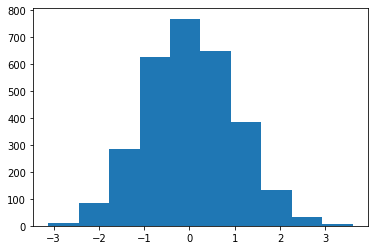

In [7]:
import matplotlib.pyplot as plt
rands = np.random.normal(0, 1, size=(days, PRIOR_N))
nbs, cnts = np.unique(rands, return_counts=True)
plt.hist(nbs, bins=10)

In [8]:
X = np.asarray(train).astype('float32')
N = np.array(np.random.normal(0, 1, size=(days, PRIOR_N)), dtype='float32')

X_noised = X + N

In [9]:
X_noised.dtype

dtype('float32')

In [10]:
X

array([[1.2495353e-02, 1.1125671e-02, 3.2520459e-03, 6.6249110e-03],
       [1.1438864e-02, 2.6905688e-03, 1.2064374e-03, 6.9467197e-03],
       [6.3166377e-04, 7.2773956e-03, 4.0486520e-03, 7.4499243e-05],
       ...,
       [7.6829945e-03, 1.9575863e-03, 7.0022419e-03, 6.4667594e-03],
       [3.3955891e-03, 1.2795907e-03, 7.6207384e-03, 1.6800676e-03],
       [4.5911991e-03, 6.6749216e-03, 7.5999559e-03, 9.5598651e-03]],
      dtype=float32)

In [11]:
np.log(np.abs(N))

array([[-1.6678413 , -2.0004854 , -1.0315387 , -0.20384976],
       [ 0.36068755,  0.04993603,  0.3071441 ,  0.09561739],
       [-0.17740366, -1.093399  ,  0.4131536 , -1.7173914 ],
       ...,
       [-2.284294  , -2.530899  ,  0.12864897,  0.77014184],
       [ 0.69533455,  0.54386586,  0.32643116, -0.74736536],
       [ 0.98740184, -0.35532624, -0.07643366,  0.10744943]],
      dtype=float32)

In [12]:
# Number of times to train the discriminator between two generator steps
TRAIN_RATIO = 4

# Total number of training iterations for the generator
N_ITER = 8001

# Batch size to use


generator = Generator().cuda()
optim_gen = torch.optim.Adam(generator.parameters(), lr=0.003, betas=(0.5,0.99))
#optim_gen = torch.optim.SGD(generator.parameters(), lr=1, momentum=0)
#criterion_gen=

discriminator = Discriminator().cuda()
optim_disc = torch.optim.Adam(discriminator.parameters(), lr=0.003, betas=(0.5,0.99))
#optim_disc = torch.optim.SGD(discriminator.parameters(), lr=1, momentum=0)

criterion = nn.BCELoss()

X = np.asarray(train).astype('float32')
N = np.array(np.random.normal(0, 1, size=(days, PRIOR_N)), dtype='float32')

X_noised = X + N

for i in tqdm(range(N_ITER)):
    X_train = torch.from_numpy(X_noised)
    BATCHLEN = int(len(X_train)/TRAIN_RATIO)
    x_batches = torch.split(X_train, BATCHLEN)
    
    # train the discriminator
    for m in range(TRAIN_RATIO):
        discriminator.zero_grad()
        real_batch = x_batches[m]
        fake_batch = generator.generate(BATCHLEN)

        # == COMPUTE THE DISCRIMINATOR LOSS HERE ==
        real_disc_prediction = discriminator(real_batch.cuda())
        #real_disc_prediction = torch.clamp(real_disc_prediction, min=0.0, max=1.0)
        real_loss = criterion(real_disc_prediction, torch.ones((BATCHLEN,1)).cuda())

        fake_disc_prediction = discriminator(fake_batch.cuda())
        #fake_disc_prediction = torch.clamp(fake_disc_prediction, min=0.0, max=1.0)
        fake_loss = criterion(fake_disc_prediction, torch.zeros((BATCHLEN,1)).cuda())

        disc_loss = real_loss + fake_loss
        
        #disc_loss = 0
        disc_loss.backward()
        optim_disc.step()
    
    # train the generator
    generator.zero_grad()
    fake_batch = generator.generate(BATCHLEN)

    # == COMPUTE THE GENERATOR LOSS HERE
    disc_pred = discriminator(fake_batch.cuda())
    #disc_pred = torch.clamp(disc_pred, min=0.0, max=1.0)
    gen_loss = criterion(disc_pred, torch.ones((BATCHLEN,1)).cuda())
    gen_loss.backward()
    optim_gen.step()

    if i%1000 == 999:
        print('step {}: discriminator: {:.3e}, generator: {:.3e}'.format(i, float(disc_loss), float(gen_loss)))
        print(sum(real_disc_prediction))
        print(sum(fake_disc_prediction))

  3%|▎         | 265/8001 [00:06<02:59, 43.08it/s]


KeyboardInterrupt: 

In [ ]:
generated_data = generator.generate(410)

In [12]:
np.min(generated_data.cpu().detach().numpy(), axis=0)

array([-2.5737429, -2.011585 , -2.958512 , -2.2993953], dtype=float32)

In [13]:
gen_df = pd.DataFrame(torch.abs(generated_data).cpu().detach().numpy())

In [14]:
train.describe(), gen_df.describe()

(                1           2           3           4
 count  746.000000  746.000000  746.000000  746.000000
 mean     0.013144    0.012822    0.009366    0.010788
 std      0.011914    0.011712    0.009283    0.009338
 min      0.000012    0.000057    0.000014    0.000067
 25%      0.004761    0.003878    0.003202    0.004226
 50%      0.010030    0.009423    0.006641    0.008508
 75%      0.017771    0.017810    0.012354    0.014221
 max      0.098709    0.088502    0.072016    0.074291,
                 0           1           2           3
 count  410.000000  410.000000  410.000000  410.000000
 mean     0.637153    0.664195    0.781714    0.771321
 std      0.483362    0.489307    0.567414    0.561323
 min      0.002476    0.000427    0.003734    0.004256
 25%      0.268854    0.265015    0.320140    0.316488
 50%      0.525828    0.552923    0.697616    0.665720
 75%      0.877810    1.001497    1.113350    1.067700
 max      2.573743    2.650641    2.958512    2.574780)

In [15]:
!pip freeze

absl-py @ file:///C:/ci/absl-py_1623867339542/work
aiohttp @ file:///C:/ci/aiohttp_1632750093640/work
argon2-cffi @ file:///C:/ci/argon2-cffi_1613037959010/work
astor==0.8.1
astunparse==1.6.3
async-generator @ file:///home/ktietz/src/ci/async_generator_1611927993394/work
async-timeout==3.0.1
attrs @ file:///tmp/build/80754af9/attrs_1620827162558/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
bleach @ file:///tmp/build/80754af9/bleach_1628110601003/work
blinker==1.4
Bottleneck==1.3.2
brotlipy==0.7.0
cachetools @ file:///tmp/build/80754af9/cachetools_1619597386817/work
certifi==2021.10.8
cffi @ file:///C:/ci/cffi_1625831749120/work
chardet @ file:///C:/ci/chardet_1607690654534/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
click==8.0.3
colorama @ file:///tmp/build/80754af9/colorama_1607707115595/work
coverage @ file:///C:/ci/coverage_1614615074147/work
cryptography @ file:///C:/ci/cryptography_1633520552480/work
cycler==

In [ ]:
! pip 